# Exploratory Data Analysis


### Here I will convert the X and Y coridinates of the positions to actual football positions

In [1]:
import pandas as pd

In [2]:
epl_matches = pd.read_csv('EPL_assignment/epl_matches_train.csv')

epl_matches.head()

,season,stage,date,match_id,home_team_id,away_team_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,...,red_card_home_team,red_card_away_team,crosses_home_team,crosses_away_team,corner_home_team,corner_away_team,possession_home_team,possession_away_team,home_team_goal,away_team_goal
0,2008/2009,1,2008-08-17 00:00:00,49337,10260,10261,1,2,4,6,...,0,0,24,9,6,6,55.0,45.0,1,1
1,2008/2009,1,2008-08-16 00:00:00,38136,9825,8659,1,2,4,6,...,0,0,21,7,7,5,66.0,34.0,1,0
2,2008/2009,1,2008-08-16 00:00:00,43276,8472,8650,1,2,4,6,...,0,0,15,19,1,8,46.0,54.0,0,1
3,2008/2009,1,2008-08-16 00:00:00,40671,8654,8528,1,2,4,6,...,0,0,15,27,6,10,52.0,48.0,2,1
4,2008/2009,1,2008-08-17 00:00:00,34633,10252,8456,1,2,4,6,...,0,0,16,16,7,8,52.0,48.0,4,2


### Plot X & Y

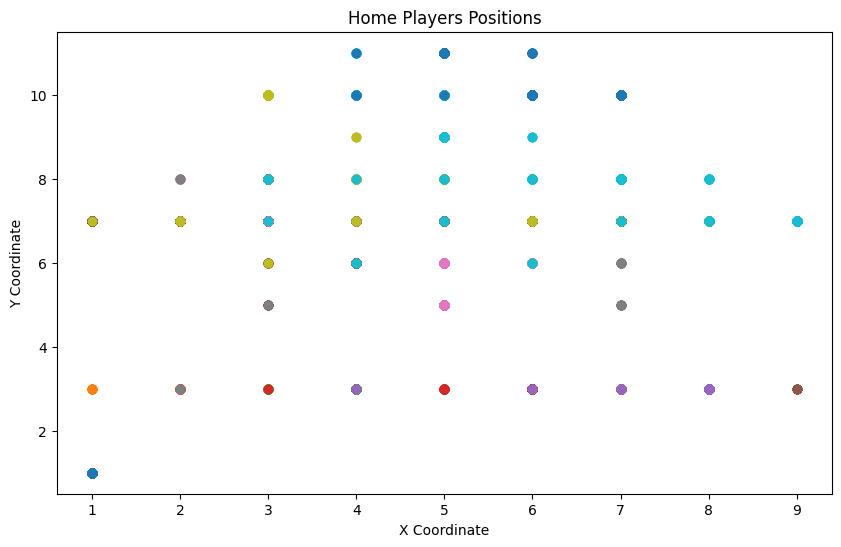

In [3]:
import matplotlib.pyplot as plt

# Extract the relevant columns
home_player_X = epl_matches[['home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 
                             'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 
                             'home_player_X11']]
home_player_Y = epl_matches[['home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 
                             'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 
                             'home_player_Y11']]

# Plot the positions
plt.figure(figsize=(10, 6))
for i in range(11):
    plt.scatter(home_player_X.iloc[:, i], home_player_Y.iloc[:, i], label=f'Player {i+1}')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Home Players Positions')
plt.show()

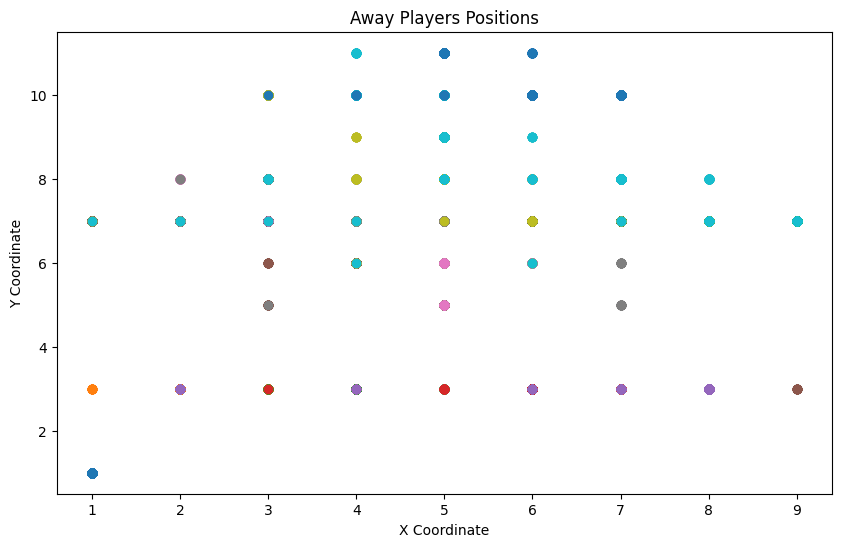

In [4]:
import matplotlib.pyplot as plt

# Extract the relevant columns
away_player_X = epl_matches[['away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 
                             'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 
                             'away_player_X11']]
away_player_Y = epl_matches[['away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 
                             'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 
                             'away_player_Y11']]

# Plot the positions
plt.figure(figsize=(10, 6))
for i in range(11):
    plt.scatter(away_player_X.iloc[:, i], away_player_Y.iloc[:, i], label=f'Player {i+1}')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Away Players Positions')
plt.show()

### Convert these points to their corresponding positions

![Positions](Positions_fb.png)

### I figured out these positions with the use of my knowledge and that of some friends, and also this image on the internet

![Positions on the internet](soccer-positions-scaled.jpg)

![Found postitions from epl](epl-positions.avif)

In [15]:
import pandas as pd

# Define a function to determine both the player position and category
def get_player_position_and_category(x, y):
    # Goalkeeper
    if x == 1 and y == 1:
        return 'GK', 'Goalkeeper'
    
    # Defenders
    elif (x, y) in [(1, 3), (9, 3)]:
        return ('LWB', 'Defender') if x == 1 else ('RWB', 'Defender')
    elif (x, y) == (2, 3):
        return 'LB', 'Defender'
    elif (x, y) == (3, 3):
        return 'LCB', 'Defender'
    elif (x, y) in [(4, 3), (5, 3), (6, 3)]:
        return 'CB', 'Defender'
    elif (x, y) == (7, 3):
        return 'RCB', 'Defender'
    elif (x, y) == (8, 3):
        return 'RB', 'Defender'
    
    # Defensive Midfielders
    elif (x, y) in [(3, 5), (3, 6)]:
        return 'LDM', 'Defensive Midfielder'
    elif (x, y) in [(5, 5), (5, 6), (4, 6), (6, 6)]:
        return 'CDM', 'Defensive Midfielder'
    elif (x, y) in [(7, 5), (7, 6)]:
        return 'RDM', 'Defensive Midfielder'
    
    # Midfielders
    elif (x, y) in [(1, 7), (2, 7)]:
        return 'LM', 'Midfielder'
    elif (x, y) in [(3, 7), (3, 8)]:
        return 'LCM', 'Midfielder'
    elif (x, y) in [(4, 7), (4, 8)]:
        return 'CM', 'Midfielder'
    elif (x, y) in [(5, 7), (5, 8)]:
        return 'CM', 'Midfielder'
    elif (x, y) in [(6, 7), (6, 8)]:
        return 'CM', 'Midfielder'
    elif (x, y) in [(7, 7), (7, 8)]:
        return 'RCM', 'Midfielder'
    elif (x, y) in [(8, 7), (8, 8)]:
        return 'RM', 'Midfielder'
    
    # Attacking Midfielders
    elif (x, y) == (4, 9):
        return 'LAM', 'Attacking Midfielder'
    elif (x, y) == (5, 9):
        return 'CAM', 'Attacking Midfielder'
    elif (x, y) == (6, 9):
        return 'RAM', 'Attacking Midfielder'
    
    # Forwards (Attackers)
    elif (x, y) == (3, 10):
        return 'LW', 'Forwarder'
    elif (x, y) == (4, 10):
        return 'LS', 'Forwarder'
    elif (x, y) == (5, 10):
        return 'SS', 'Forwarder'
    elif (x, y) == (6, 10):
        return 'RS', 'Forwarder'
    elif (x, y) == (7, 10):
        return 'RW', 'Forwarder'
    
    # Strikers (Attackers)
    elif (x, y) == (4, 11):
        return 'LF', 'Striker'
    elif (x, y) == (5, 11):
        return 'CF', 'Striker'
    elif (x, y) == (6, 11):
        return 'RF', 'Striker'
    
    # Default case
    return 'Unknown', 'Unknown'

# Apply function row-wise
home_positions = home_player_X.apply(lambda row: [get_player_position_and_category(row[i], home_player_Y.iloc[row.name, i]) for i in range(11)], axis=1)

away_positions = away_player_X.apply(lambda row: [get_player_position_and_category(row[i], away_player_Y.iloc[row.name, i]) for i in range(11)], axis=1)

# Extract the positions and categories into separate columns
for i in range(11):
    epl_matches[f'home_player_position_{i+1}'] = home_positions.apply(lambda x: x[i][0])
    epl_matches[f'home_player_category_{i+1}'] = home_positions.apply(lambda x: x[i][1])

# Extract the positions and categories into separate columns
for i in range(11):
    epl_matches[f'away_player_position_{i+1}'] = away_positions.apply(lambda x: x[i][0])
    epl_matches[f'away_player_category_{i+1}'] = away_positions.apply(lambda x: x[i][1])


# Print a sample to check results
print(epl_matches.head())


      season  stage                 date  match_id  home_team_id  \
0  2008/2009      1  2008-08-17 00:00:00     49337         10260   
1  2008/2009      1  2008-08-16 00:00:00     38136          9825   
2  2008/2009      1  2008-08-16 00:00:00     43276          8472   
3  2008/2009      1  2008-08-16 00:00:00     40671          8654   
4  2008/2009      1  2008-08-17 00:00:00     34633         10252   

   away_team_id  home_player_X1  home_player_X2  home_player_X3  \
0         10261               1               2               4   
1          8659               1               2               4   
2          8650               1               2               4   
3          8528               1               2               4   
4          8456               1               2               4   

   home_player_X4  ...  away_player_position_7  away_player_category_7  \
0               6  ...                      CM              Midfielder   
1               6  ...                  

### First we have to connect the 2 datasets:

In [16]:
epl_matches.columns

Index(['season', 'stage', 'date', 'match_id', 'home_team_id', 'away_team_id',
       'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
       ...
       'away_player_position_7', 'away_player_category_7',
       'away_player_position_8', 'away_player_category_8',
       'away_player_position_9', 'away_player_category_9',
       'away_player_position_10', 'away_player_category_10',
       'away_player_position_11', 'away_player_category_11'],
      dtype='object', length=134)

In [17]:
epl_players = pd.read_csv('EPL_assignment/epl_players.csv')

epl_players.columns

Index(['player_id', 'birthday', 'height', 'weight', 'date', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [18]:
# Convert player_id to integers in both datasets
epl_players['player_id'] = epl_players['player_id'].astype(int)

# Convert all player columns in epl_matches to integers
player_columns = ['home_player_1', 'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5',
                  'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11',
                  'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5',
                  'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11']

epl_matches[player_columns] = epl_matches[player_columns].fillna(0).astype(int)


In [19]:
epl_matches

,season,stage,date,match_id,home_team_id,away_team_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,...,away_player_position_7,away_player_category_7,away_player_position_8,away_player_category_8,away_player_position_9,away_player_category_9,away_player_position_10,away_player_category_10,away_player_position_11,away_player_category_11
0,2008/2009,1,2008-08-17 00:00:00,49337,10260,10261,1,2,4,6,...,CM,Midfielder,CM,Midfielder,RM,Midfielder,CAM,Attacking Midfielder,CF,Striker
1,2008/2009,1,2008-08-16 00:00:00,38136,9825,8659,1,2,4,6,...,RCM,Midfielder,Unknown,Unknown,LM,Midfielder,LCM,Midfielder,CF,Striker
2,2008/2009,1,2008-08-16 00:00:00,43276,8472,8650,1,2,4,6,...,CM,Midfielder,CM,Midfielder,RM,Midfielder,LS,Forwarder,RS,Forwarder
3,2008/2009,1,2008-08-16 00:00:00,40671,8654,8528,1,2,4,6,...,CM,Midfielder,CM,Midfielder,RM,Midfielder,LS,Forwarder,RS,Forwarder
4,2008/2009,1,2008-08-17 00:00:00,34633,10252,8456,1,2,4,6,...,LCM,Midfielder,CM,Midfielder,RCM,Midfielder,Unknown,Unknown,CF,Striker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,2014/2015,9,2014-10-25 00:00:00,48955,8472,9825,1,2,4,6,...,CDM,Defensive Midfielder,LCM,Midfielder,CM,Midfielder,RCM,Midfielder,CF,Striker
2656,2014/2015,9,2014-10-25 00:00:00,38293,10003,8197,1,2,4,6,...,CDM,Defensive Midfielder,LCM,Midfielder,CM,Midfielder,RCM,Midfielder,CF,Striker
2657,2014/2015,9,2014-10-26 00:00:00,40230,8586,10261,1,2,4,6,...,CDM,Defensive Midfielder,LCM,Midfielder,CM,Midfielder,RCM,Midfielder,CF,Striker
2658,2014/2015,9,2014-10-25 00:00:00,45930,8659,9826,1,2,4,6,...,CM,Midfielder,CM,Midfielder,RM,Midfielder,CAM,Attacking Midfielder,CF,Striker


In [20]:
# Merge home players
home_players = epl_matches.melt(id_vars=['match_id', 'date'], 
                                value_vars=[f'home_player_{i}' for i in range(1, 12)], 
                                var_name='position', 
                                value_name='player_id')

# Extract player number (1, 2, 3, ..., 11) from 'home_player_1', 'home_player_2', etc.
home_players['player_number'] = home_players['position'].str.extract(r'home_player_(\d+)').astype(int)

# Add 'team' column for home players
home_players['team'] = 'home'

# Merge away players
away_players = epl_matches.melt(id_vars=['match_id', 'date'], 
                                value_vars=[f'away_player_{i}' for i in range(1, 12)], 
                                var_name='position', 
                                value_name='player_id')

# Extract player number (1, 2, 3, ..., 11) from 'away_player_1', 'away_player_2', etc.
away_players['player_number'] = away_players['position'].str.extract(r'away_player_(\d+)').astype(int)

# Add 'team' column for away players
away_players['team'] = 'away'

# Concatenate both dataframes (home and away players)
match_players = pd.concat([home_players, away_players], ignore_index=True)

# Convert player_id to integer (handling floats)
match_players['player_id'] = match_players['player_id'].astype('Int64')

# Now we can use the 'player_number' to assign positions and categories later
match_players = match_players.merge(epl_players, on='player_id', how='left')


In [21]:
match_players

,match_id,date_x,position,player_id,player_number,team,birthday,height,weight,date_y,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,49337,2008-08-17 00:00:00,home_player_1,30726,1,home,10/29/1970 0:00,198.12,196.0,2/22/2011 0:00,...,40.0,24.0,12.0,10.0,11.0,82.0,87.0,85.0,93.0,75.0
1,49337,2008-08-17 00:00:00,home_player_1,30726,1,home,10/29/1970 0:00,198.12,196.0,8/30/2010 0:00,...,40.0,24.0,12.0,10.0,11.0,82.0,87.0,85.0,93.0,75.0
2,49337,2008-08-17 00:00:00,home_player_1,30726,1,home,10/29/1970 0:00,198.12,196.0,2/22/2010 0:00,...,40.0,77.0,20.0,20.0,11.0,82.0,86.0,85.0,92.0,77.0
3,49337,2008-08-17 00:00:00,home_player_1,30726,1,home,10/29/1970 0:00,198.12,196.0,8/30/2009 0:00,...,40.0,43.0,20.0,20.0,11.0,82.0,86.0,85.0,92.0,77.0
4,49337,2008-08-17 00:00:00,home_player_1,30726,1,home,10/29/1970 0:00,198.12,196.0,2/22/2009 0:00,...,40.0,43.0,20.0,33.0,11.0,84.0,85.0,85.0,91.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505622,59737,2014-10-25 00:00:00,away_player_11,15403,11,away,3/17/1986 0:00,193.04,185.0,8/30/2009 0:00,...,76.0,78.0,20.0,22.0,16.0,5.0,20.0,57.0,20.0,20.0
1505623,59737,2014-10-25 00:00:00,away_player_11,15403,11,away,3/17/1986 0:00,193.04,185.0,2/22/2009 0:00,...,76.0,56.0,20.0,22.0,16.0,5.0,20.0,48.0,20.0,20.0
1505624,59737,2014-10-25 00:00:00,away_player_11,15403,11,away,3/17/1986 0:00,193.04,185.0,8/30/2008 0:00,...,76.0,56.0,20.0,22.0,16.0,5.0,20.0,48.0,20.0,20.0
1505625,59737,2014-10-25 00:00:00,away_player_11,15403,11,away,3/17/1986 0:00,193.04,185.0,8/30/2007 0:00,...,76.0,56.0,36.0,47.0,16.0,11.0,20.0,58.0,20.0,20.0


In [22]:
for i in range(1, 12):
    # Extract position and category for home players based on player_number
    match_players.loc[(match_players['team'] == 'home') & (match_players['player_number'] == i), 'position_name'] = epl_matches[f'home_player_position_{i}'].values[0]
    match_players.loc[(match_players['team'] == 'home') & (match_players['player_number'] == i), 'position_category'] = epl_matches[f'home_player_category_{i}'].values[0]
    
    # Extract position and category for away players based on player_number
    match_players.loc[(match_players['team'] == 'away') & (match_players['player_number'] == i), 'position_name'] = epl_matches[f'away_player_position_{i}'].values[0]
    match_players.loc[(match_players['team'] == 'away') & (match_players['player_number'] == i), 'position_category'] = epl_matches[f'away_player_category_{i}'].values[0]

# Display the final dataframe with positions and categories
print(match_players[['player_id', 'team', 'player_number', 'position_name', 'position_category']].head())

# Display merged dataset
match_players.head()


   player_id  team  player_number position_name position_category
0      30726  home              1            GK        Goalkeeper
1      30726  home              1            GK        Goalkeeper
2      30726  home              1            GK        Goalkeeper
3      30726  home              1            GK        Goalkeeper
4      30726  home              1            GK        Goalkeeper


,match_id,date_x,position,player_id,player_number,team,birthday,height,weight,date_y,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,position_name,position_category
0,49337,2008-08-17 00:00:00,home_player_1,30726,1,home,10/29/1970 0:00,198.12,196.0,2/22/2011 0:00,...,12.0,10.0,11.0,82.0,87.0,85.0,93.0,75.0,GK,Goalkeeper
1,49337,2008-08-17 00:00:00,home_player_1,30726,1,home,10/29/1970 0:00,198.12,196.0,8/30/2010 0:00,...,12.0,10.0,11.0,82.0,87.0,85.0,93.0,75.0,GK,Goalkeeper
2,49337,2008-08-17 00:00:00,home_player_1,30726,1,home,10/29/1970 0:00,198.12,196.0,2/22/2010 0:00,...,20.0,20.0,11.0,82.0,86.0,85.0,92.0,77.0,GK,Goalkeeper
3,49337,2008-08-17 00:00:00,home_player_1,30726,1,home,10/29/1970 0:00,198.12,196.0,8/30/2009 0:00,...,20.0,20.0,11.0,82.0,86.0,85.0,92.0,77.0,GK,Goalkeeper
4,49337,2008-08-17 00:00:00,home_player_1,30726,1,home,10/29/1970 0:00,198.12,196.0,2/22/2009 0:00,...,20.0,33.0,11.0,84.0,85.0,85.0,91.0,84.0,GK,Goalkeeper


In [23]:
match_players.columns

Index(['match_id', 'date_x', 'position', 'player_id', 'player_number', 'team',
       'birthday', 'height', 'weight', 'date_y', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'position_name',
       'position_category'],
      dtype='object')

### Now the away and home players have the correct positions + What role they play, so they can be evaluated differently.

### Goalkeepers (GK)

In [24]:
def calculate_goalkeeper_rating(player):
    return (
        player['gk_diving'] * 0.25 +
        player['gk_handling'] * 0.20 +
        player['gk_kicking'] * 0.20 +
        player['gk_positioning'] * 0.20 +
        player['gk_reflexes'] * 0.15
    )

### Defenders (CB, LB, RB, LWB, RWB)

In [25]:
def calculate_defender_rating(player):
    return (
        player['marking'] * 0.25 +
        player['standing_tackle'] * 0.20 +
        player['sliding_tackle'] * 0.15 +
        player['strength'] * 0.15 +
        player['interceptions'] * 0.10 +
        player['jumping'] * 0.10 +
        player['aggression'] * 0.05
    )

### Defensive Midfielders (CDM, LDM, RDM)

In [26]:
def calculate_defensive_midfielder_rating(player):
    return (
        player['interceptions'] * 0.30 +
        player['stamina'] * 0.25 +
        player['strength'] * 0.20 +
        player['ball_control'] * 0.15 +
        player['short_passing'] * 0.10
    )

### Midfielders (CM, LCM, RCM, LM, RM)

In [27]:
def calculate_midfielder_rating(player):
    return (
        player['short_passing'] * 0.25 +
        player['long_passing'] * 0.20 +
        player['vision'] * 0.15 +
        player['ball_control'] * 0.15 +
        player['agility'] * 0.10 +
        player['stamina'] * 0.10 +
        player['interceptions'] * 0.05
    )

### Attacking Midfielders (CAM, LAM, RAM)

In [28]:
def calculate_attacking_midfielder_rating(player):
    return (
        player['vision'] * 0.30 +
        player['dribbling'] * 0.25 +
        player['short_passing'] * 0.20 +
        player['ball_control'] * 0.15 +
        player['agility'] * 0.10
    )

### Forwards (SS, LW, RW)

In [29]:
def calculate_forwarder_rating(player):
    return (
        player['dribbling'] * 0.30 +
        player['acceleration'] * 0.20 +
        player['sprint_speed'] * 0.15 +
        player['finishing'] * 0.10 +
        player['agility'] * 0.10 +
        player['vision'] * 0.10 +
        player['short_passing'] * 0.05
    )

### Strikers (CF, ST, LF, RF)

In [30]:
def calculate_striker_rating(player):
    return (
        player['finishing'] * 0.35 +
        player['positioning'] * 0.20 +
        player['shot_power'] * 0.15 +
        player['heading_accuracy'] * 0.10 +
        player['reactions'] * 0.10 +
        player['strength'] * 0.05 +
        player['sprint_speed'] * 0.05
    )

### The master function for the final calculation

In [21]:
def calculate_player_rating(player):
    if player['position_category'] == 'Striker':
        return calculate_striker_rating(player)
    elif player['position_category'] == 'Forwarder':
        return calculate_forwarder_rating(player)
    elif player['position_category'] == 'Attacking Midfielder':
        return calculate_attacking_midfielder_rating(player)
    elif player['position_category'] == 'Midfielder':
        return calculate_midfielder_rating(player)
    elif player['position_category'] == 'Defensive Midfielder':
        return calculate_defensive_midfielder_rating(player)
    elif player['position_category'] == 'Defender':
        return calculate_defender_rating(player)
    elif player['position_category'] == 'Goalkeeper':
        return calculate_goalkeeper_rating(player)
    return 0  # Default for unknown positions

# Assign ratings
match_players['player_rating'] = match_players.apply(calculate_player_rating, axis=1)

I figured these coefficients out based on a mix of common football knowledge, real-world player traits, and my own observations from football analytics and coaching. I realized that, generally, attributes like **vision** and **dribbling** are far more influential for attacking midfielders because they play a crucial role in creating opportunities and progressing the ball forward. On the other hand, **agility** and **ball control** are still important but aren't as vital as vision or dribbling.

I also took some inspiration from football management simulations like [**Football Manager**](https://www.reddit.com/r/footballmanagergames/comments/13gfru4/attributes_weights_theorycrafting/), which reflects how attributes are weighted in real-life football. A lot of football analysts and coaches agree on the importance of these key attributes for attacking midfielders.

If I wanted to validate or tweak these coefficients further, I could experiment with statistical analysis on a large dataset of player performances, which would show me which attributes correlate most strongly with success on the pitch for attacking midfielders. I could also dive into more detailed football analytics platforms, like [**Opta**](https://optaplayerstats.statsperform.com/en_GB/soccer), [**StatsBomb**](https://statsbomb.com), or [**Whoscored**](https://www.whoscored.com), to get a better understanding of how player stats break down by position, or check forums like [**FM Scout**](https://www.fmscout.com) to see what the community thinks about player ratings.

### Find out the best players

In [ ]:
# But this is another way
top_10_unique_players = match_players[['player_id', 'position_category', 'player_rating']] \
    .groupby('player_id', as_index=False) \
    .agg({'player_rating': 'max', 'position_category': 'first'}) \
    .sort_values(by='player_rating', ascending=False) \
    .head(10)

print(top_10_unique_players)



     player_id  player_rating position_category
456      30893          93.00        Midfielder
395      30613          92.75        Midfielder
404      30627          91.60          Defender
432      30822          91.30        Midfielder
444      30853          91.25         Forwarder
669      37459          91.00        Midfielder
494      31435          90.35        Midfielder
449      30865          90.30          Defender
567      33974          90.25        Midfielder
936     107417          90.25        Midfielder


In [30]:
# This is a way to do it
top_10_avg_players = match_players.groupby('player_id', as_index=False) \
    .agg({'player_rating': 'mean', 'position_category': 'first'}) \
    .sort_values(by='player_rating', ascending=False) \
    .head(10)

print(top_10_avg_players)


     player_id  player_rating position_category
449      30865      87.180357          Defender
395      30613      87.007924        Midfielder
485      31097      86.371697        Midfielder
404      30627      85.581481          Defender
424      30726      85.462500        Goalkeeper
383      30373      84.757692        Midfielder
669      37459      84.714205        Midfielder
453      30889      84.580357        Midfielder
936     107417      84.092438        Midfielder
57       23139      84.091667         Forwarder


### The second way is better, mainly because you take the average performance across all matches. So:

In [32]:
# Conclusion
top_10_avg_players['rank'] = range(1, 11)
print(top_10_avg_players[['player_id', 'rank']])

     player_id  rank
449      30865     1
395      30613     2
485      31097     3
404      30627     4
424      30726     5
383      30373     6
669      37459     7
453      30889     8
936     107417     9
57       23139    10


### Now check the worst performance on average


In [31]:
# This is a way to do it
lowest_10_avg_players = match_players.groupby('player_id', as_index=False) \
    .agg({'player_rating': 'mean', 'position_category': 'first'}) \
    .sort_values(by='player_rating', ascending=True) \
    .head(10)

print(lowest_10_avg_players)

      player_id  player_rating     position_category
728       38994      45.778542              Defender
1209     280653      50.611310              Defender
1016     149895      51.518000            Midfielder
196       24183      52.215500              Defender
1026     150613      53.942308  Attacking Midfielder
922      102602      54.431818            Midfielder
1175     214570      54.997531              Defender
44        23036      55.256250            Midfielder
1237     316688      55.778125              Defender
97        23431      56.142391             Forwarder


### So: The least 10 players are:

In [33]:
# Conclusion
lowest_10_avg_players['rank'] = range(1, 11)
print(lowest_10_avg_players[['player_id', 'rank']])

      player_id  rank
728       38994     1
1209     280653     2
1016     149895     3
196       24183     4
1026     150613     5
922      102602     6
1175     214570     7
44        23036     8
1237     316688     9
97        23431    10
